Question 1

A hypothesis needs to be statistically testable, which means the data we are collecting can be objectively measured and quantified. Other than being testable, a good null hypothesis also needs to precisely state that there's no effect or difference between the variables which are going to be tested. Furthermore, a null hypothesis needs to be falsifiable such that it can be rejected as most of the time that is what the scientists are aiming for. The null hypothesis is the statement of "no effect" whereas the alternative hypothesis suggests the exact opposite of the null hypothesis (all other outcomes that is not covered by the null hypothesis). The null hypothesis is denoted as H0 and the alternative is denoted as Ha or H1.

Question 2

xi represents an individual datapoint in the sample dataset, where i represents the "i-th" data point. x̅ represents the mean of all the datapoints in the sample dataset extracted from the whole population and μ represents the mean of the whole population, which is often unknown and our aim is to give a reasonable estimation. μ0 is the hypothesized population mean stated in the null hypothesis, and if μ0=μ, then we failed to reject the null hypothesis.

Summary - STA130 Overview: We began with a discussion of STA130 at the University of Toronto, which is an introductory statistics course. I outlined key topics covered in the course, such as descriptive statistics, probability, hypothesis testing, and regression.

Hypothesis Testing (Video): You referred to a pre-lecture video on hypothesis testing, and I explained the key factor that makes an idea testable (it must be measurable and objective). We also discussed the criteria for a good null hypothesis (specific, testable, and refutable) and the difference between a null hypothesis (assumes no effect) and an alternative hypothesis (suggests an effect).

Population vs. Sample (Video): You asked about a statement from the video related to test outcomes referring to population parameters. I explained how sample statistics (xi, x̅) are used to estimate population parameters (μ, μ0), but the conclusions of a statistical test apply to the population as a whole, rather than just the sample.

https://chatgpt.com/share/670c9de4-766c-8004-9887-44961d38be7b

Question 3

The p value is a measure of the probability that tells us how far our actual observed result is from what we would expect in the hypothesized world where the null hypothesis is correct. A very low p value (p=0.05) suggests that the obtained result does not fit in the hypothesized world, thus the null hypothesis is rejected. We fail to reject the null hypothesis (H₀) when the p-value is greater than or equal to a the significance level.

Question 4

As mentioned above, the p value is the probability of how likely that our observed result is going to occur in the imaginary world where the null hypothesis is set to be true. That being said, the smaller the p value is, the less believable the assumption is. Since a very small p value suggest that our observed result is highly unlikely to occur under the assumption of the null hypothesis being true, it makes sense for us to reject the assumption or the null hypothesis.

Summary - Second Pre-Lecture Video (P-Value): You brought up a second pre-lecture video on p-values. I explained why we assume the null hypothesis is true when calculating a p-value, and how the p-value measures how likely it is to observe our data if the null hypothesis were correct. The relevance of the sampling distribution was also discussed.

Smaller P-Value and Null Hypothesis: Lastly, we discussed why a smaller p-value makes the null hypothesis seem "more ridiculous." I explained that a small p-value indicates that our data is very unlikely under the null hypothesis, making it harder to believe the null is true, which leads us to consider rejecting it.

https://chatgpt.com/share/670c9de4-766c-8004-9887-44961d38be7b

In [1]:
#Question 5

import numpy as np

# Number of couples
n_couples = 124

# Number of right tilts observed in the real data
observed_right_tilts = 80

# Number of simulations
n_simulations = 10000

# Simulate 10,000 samples of 124 coin flips (50% chance of tilting right)
simulated_right_tilts = np.random.binomial(n=n_couples, p=0.5, size=n_simulations)

# Calculate the proportion of simulations where the number of right tilts is greater than or equal to 80
p_value = np.mean(simulated_right_tilts >= observed_right_tilts)

p_value

0.0016

Question 5 Cont.

Null hypothesis (H₀): Couples have a 50/50 chance of tilting their heads right or left when kissing (no preference for either side).

∵ p value = 0.0016
0.01 ≥ 0.0016 > 0.001

∴ Strong evidence against the null hypothesis

Summary - Güntürkün (2003) Study Simulation: You brought up a study by Güntürkün (2003) regarding head tilting in kissing couples. I outlined how to simulate a p-value using a "50/50 coin-flipping" model to test the null hypothesis that there is no head-tilt tendency. I provided a Python code example for running the simulation and explained how to interpret the p-value based on a defined table.

https://chatgpt.com/share/670c9de4-766c-8004-9887-44961d38be7b

Question 6

A small p value can never definitively disprove the null hypothesis nor can a p value that's close to 1 definitively proves the null hypothesis. A p value only provides evidence that's in favor of or against a null hypothesis and it does not provides a conclusion. No matter how strong the evidence is, there's always a chance of error. Hence, in real world data analysis, the p value will not be exactly 0 or exactly 1.

In [2]:
# Question 7

import pandas as pd
import numpy as np

# Sample patient data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate health score change
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

# Set the random seed for reproducibility
np.random.seed(1)

# Number of simulations
number_of_simulations = 10000

# Observed statistic (proportion of patients who improved their health score)
observed_statistic = (patient_data['HealthScoreChange'] > 0).mean()

# Simulating the null hypothesis (no effect of the vaccine)
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

for i in range(number_of_simulations):
    # Generate random health score change signs (0 = no improvement, 1 = improvement)
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Calculate the p-value for a one-sided test (testing for improvements only)
SimStats_as_or_more_extreme_than_ObsStat = IncreaseProportionSimulations_underH0random >= observed_statistic
p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations

# Output the results
print("Number of Simulations: ", number_of_simulations)
print("Observed statistic (proportion of patients with health improvement):", observed_statistic)
print("Number of simulated statistics (under H0) that are as or more extreme than the observed statistic:", SimStats_as_or_more_extreme_than_ObsStat.sum())
print("P-value (one-sided test):", p_value)


Number of Simulations:  10000
Observed statistic (proportion of patients with health improvement): 0.8
Number of simulated statistics (under H0) that are as or more extreme than the observed statistic: 565
P-value (one-sided test): 0.0565


Question 7

Instead of checking both the possibility of the observed result being larger than the null hypothesis population parameter and the possibility of the observed result being smaller than the null hypothesis population parameter, a one-sided only check from one direction which means either larger or smaller. It is expected for the p value to be smaller in a one-tailed test compared to a two-tailed test because we only focuses on the extreme values on one direction. In order to change into a one-sided hypothesis test, we eliminate the use of abs function as the code only needs check if the simulated statistics are greater than or equal to the observed statistic using (simulated_statistics >= observed_statistic).

Summary - Two-Sided vs. One-Sided Tests: We explored the difference between one-sided (one-tailed) and two-sided (two-tailed) hypothesis tests. You requested help in adjusting Python code from a Week 5 tutorial to compute a p-value for a one-sided test rather than a two-sided one.

Vaccine Data Analysis: I provided a complete Python code that simulates p-values for a one-sided hypothesis test, based on vaccine data. This code calculates how many simulated statistics are greater than or equal to the observed statistic, which is key in a one-sided test.

https://chatgpt.com/share/670c9de4-766c-8004-9887-44961d38be7b

Question 8

Relationship between this experiment and fisher’s original experiment: The sample of the original experiment is the number of cups of milktea (8). Instead, the sample of the replication is the number of STA130 students (80). This distinguishs the purpose of the two experiment as the original experiment primarily focuses on an inidividual's (Bristol's) ability in identifying whether tea or milk was poured first and the replication extented to the bondary of the population.

Formal null hypothesis: There is no significant difference between the STA130 students and random guessing in identifying whether tea or milk was poured first. H0:p=0.5 (p is the proportion of students who can correctly identify the order in the population parameter)

Informal null hypothesis: The STA130 students' ability to identify whether tea or milk was poured first is fifty fifty because they have no ability to tell the difference and they are getting it right completely due to chance.

Formal alternative hypothesis: The STA130 students and random guessing in identifying whether tea or milk was poured first shows statistically significant difference where the STA130 students are better in this case. Ha:p>0

Population: All STA130 students or people who drink milktea in general.

Sample: 80 STA130 students (49 of which correctly idenitifed the order)

Parameter of interest: the proportion of the population who can correctly identify the order

Corresponding Observed Test Statistic: proportion of the 80 STA130 students who can correctly identify the order (0.6125)

Methodology: We generate a large number of samples (10000) and set the probability of correct guess to be 0.5 which makes this simulation to be run under the null hypothesis. This simulation gives us the proportion of correct answers under the null hypothesis. Then we can compare how many simulated proportions are as extreme or more extreme than the observed proportion of 0.6125 and the code will print the p value.

Conclusion: The p value is 0.0294 which is between 0.05 and 0.01 (0.05 ≥ 0.0294 > 0.01), suggesting moderate evidence against the null hypothesis, concluding that students might be able to identify the order.

P-value: 0.0294
95% Confidence Interval: [31. 49.]


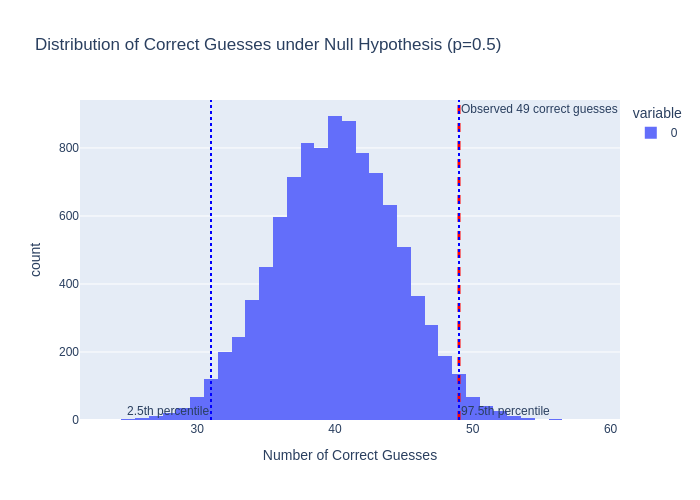

In [4]:
import scipy.stats as stats
import plotly.express as px
import numpy as np

# Parameters
n = 80  # total number of students
k = 49  # number of correct guesses
p_null = 0.5  # probability under the null hypothesis

# Set seed for reproducibility
np.random.seed(42)

# Generate 10,000 samples from a binomial distribution with p=0.5
number_of_simulations = 10000
simulations = np.random.binomial(n, p_null, number_of_simulations)

# Calculate the p-value as the proportion of simulations where the result is >= 49
p_value = np.mean(simulations >= k)
print(f"P-value: {p_value}")

# Calculate the 95% confidence interval
confidence_interval = np.percentile(simulations, [2.5, 97.5])
print(f"95% Confidence Interval: {confidence_interval}")

# Visualize the distribution with the 95% CI
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p_null)

# Create a plot with Plotly
fig = px.histogram(simulations, nbins=50, labels={'value':'Number of Correct Guesses'},
                   title='Distribution of Correct Guesses under Null Hypothesis (p=0.5)')
fig.add_vline(x=k, line_width=3, line_dash="dash", line_color="red", 
              annotation_text="Observed 49 correct guesses", annotation_position="top right")

# Adding the 95% confidence interval lines
fig.add_vline(x=confidence_interval[0], line_width=2, line_dash="dot", line_color="blue",
              annotation_text="2.5th percentile", annotation_position="bottom left")
fig.add_vline(x=confidence_interval[1], line_width=2, line_dash="dot", line_color="blue",
              annotation_text="97.5th percentile", annotation_position="bottom right")

fig.show(renderer="png")

Question 9

Somewhat